In [1]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt

In [2]:
# path = "forest_fires.csv"
path = "Global Missing Migrants Dataset.csv"

In [3]:
df = pd.read_csv(path, encoding="ISO-8859-1")
df.head(2)

,ï»¿Incident Type,Incident year,Reported Month,Region of Origin,Region of Incident,Country of Origin,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping
0,Incident,2014,January,Central America,North America,Guatemala,1.0,0,1,0,0,1,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",Northern America
1,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1.0,0,1,0,0,0,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.59713, -111.73756",Northern America


In [4]:
df.rename(columns={"ï»¿Incident Type": "incident_type"}, inplace=True)
df.head(2)

,incident_type,Incident year,Reported Month,Region of Origin,Region of Incident,Country of Origin,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping
0,Incident,2014,January,Central America,North America,Guatemala,1.0,0,1,0,0,1,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",Northern America
1,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1.0,0,1,0,0,0,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.59713, -111.73756",Northern America


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13020 entries, 0 to 13019
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   incident_type                        13020 non-null  object 
 1   Incident year                        13020 non-null  int64  
 2   Reported Month                       13020 non-null  object 
 3   Region of Origin                     12998 non-null  object 
 4   Region of Incident                   13020 non-null  object 
 5   Country of Origin                    13012 non-null  object 
 6   Number of Dead                       12470 non-null  float64
 7   Minimum Estimated Number of Missing  13020 non-null  int64  
 8   Total Number of Dead and Missing     13020 non-null  int64  
 9   Number of Survivors                  13020 non-null  int64  
 10  Number of Females                    13020 non-null  int64  
 11  Number of Males             

In [6]:
print(df["Incident year"].unique())

[2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]


In [7]:
print("Number of Females")
print(df["Number of Females"].sum())

Number of Females
5968


In [8]:
print("Number of Males")
print(df["Number of Males"].sum())

Number of Males
14531


In [9]:
print("Number of Children")
print(df["Number of Children"].sum())

Number of Children
3100


In [10]:
print("Number of Deaths")
print(df["Number of Dead"].sum())
print()
print("Location of Death")
print(df['Location of death'].value_counts())

Number of Deaths
32718.0

Location of Death
Pima Country Office of the Medical Examiner jurisdiction, Arizona, USA (see coordinates for exact location)    1061
Pima County Office of the Medical Examiner jurisdiction, Arizona, USA (see coordinates for exact location)      404
Reported at Milak border crossing, Iran                                                                         200
Agadez, Niger                                                                                                   121
Sahara desert, Libya                                                                                            116
                                                                                                               ... 
Evros River, near Orestiada, Greece                                                                               1
Bodies recovered near Plage de Trougout, Nador, Morocco                                                           1
Namanga, Tanzania-Kenya bord

In [11]:
print("Routes")
print(df["Migration route"].value_counts())

Routes
US-Mexico border crossing                                3392
Sahara Desert crossing                                   2046
Central Mediterranean                                    1106
Afghanistan to Iran                                      1099
Western Mediterranean                                     614
Eastern Mediterranean                                     336
Western Africa / Atlantic route to the Canary Islands     226
Western Balkans                                           210
Horn of Africa to Yemen crossing                          161
TÃ¼rkiye-Europe land route                                157
English Channel to the UK                                 134
Syria to TÃ¼rkiye                                         129
Darien                                                     98
Caribbean to US                                            63
Belarus-EU border                                          61
Dominican Republic to Puerto Rico                          42
I

In [12]:
print("Cause of Death")
print(df["Cause of Death"].value_counts())
# TÃ¼rkiye-Europe land route

Cause of Death
Drowning                                                                                                                   3313
Mixed or unknown                                                                                                           3175
Vehicle accident / death linked to hazardous transport                                                                     2112
Harsh environmental conditions / lack of adequate shelter, food, water                                                     1360
Violence                                                                                                                   1313
Sickness / lack of access to adequate healthcare                                                                           1219
Accidental death                                                                                                            507
Drowning,Harsh environmental conditions / lack of adequate shelter, food, water          

In [13]:
deaths_per_month = df.groupby(["Reported Month"])['Cause of Death'].value_counts()
print(deaths_per_month)

Reported Month  Cause of Death                                                                                                         
April           Drowning                                                                                                                   293
                Mixed or unknown                                                                                                           198
                Vehicle accident / death linked to hazardous transport                                                                     186
                Violence                                                                                                                   108
                Sickness / lack of access to adequate healthcare                                                                            83
                                                                                                                                          ... 
Septem

In [14]:
deaths_per_year = df.groupby(['Incident year'])['Number of Dead'].sum()

print(deaths_per_year)

Incident year
2014    1753.0
2015    4094.0
2016    4294.0
2017    3726.0
2018    3203.0
2019    3622.0
2020    2354.0
2021    3651.0
2022    4296.0
2023    1725.0
Name: Number of Dead, dtype: float64


In [15]:
region_count = df['Region of Incident'].value_counts()

print(region_count)

North America         2706
Mediterranean         2055
Northern Africa       2014
Southern Asia         1673
Central America       1375
Western Africa         967
Europe                 619
Eastern Africa         489
Western Asia           414
South-eastern Asia     237
South America          209
Caribbean              160
Middle Africa           75
Southern Africa         16
Eastern Asia            10
Central Asia             1
Name: Region of Incident, dtype: int64


<Axes: ylabel='Reported Month,Cause of Death'>

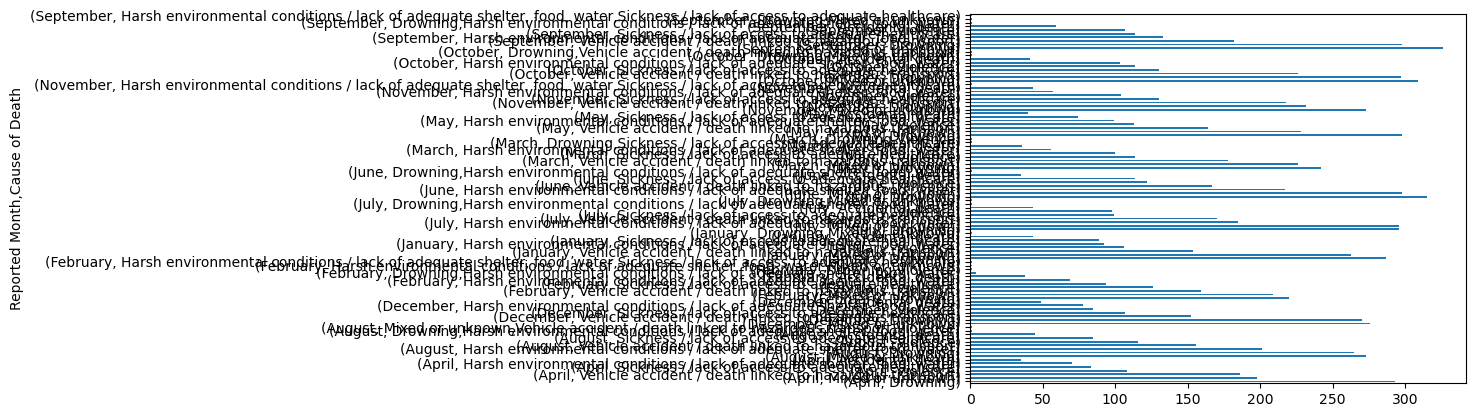

In [16]:
deaths_per_month = df.groupby(["Reported Month"])['Cause of Death'].value_counts()

deaths_per_month.plot(kind='barh')

In [17]:
df_copy = df.copy()

In [18]:
# Drop all rows with missing information
df_copy = df_copy.dropna(how='any')

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9427 entries, 0 to 13019
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   incident_type                        9427 non-null   object 
 1   Incident year                        9427 non-null   int64  
 2   Reported Month                       9427 non-null   object 
 3   Region of Origin                     9427 non-null   object 
 4   Region of Incident                   9427 non-null   object 
 5   Country of Origin                    9427 non-null   object 
 6   Number of Dead                       9427 non-null   float64
 7   Minimum Estimated Number of Missing  9427 non-null   int64  
 8   Total Number of Dead and Missing     9427 non-null   int64  
 9   Number of Survivors                  9427 non-null   int64  
 10  Number of Females                    9427 non-null   int64  
 11  Number of Males              

In [19]:
df_copy.rename(columns={"ï»¿Incident Type": "incident_type"}, inplace=True)
df_copy.head(2)

,incident_type,Incident year,Reported Month,Region of Origin,Region of Incident,Country of Origin,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping
0,Incident,2014,January,Central America,North America,Guatemala,1.0,0,1,0,0,1,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",Northern America
1,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1.0,0,1,0,0,0,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.59713, -111.73756",Northern America


In [20]:
df_copy['Number of Dead'].value_counts()

1.0      6788
2.0      1017
3.0       480
4.0       220
5.0       167
         ... 
49.0        1
35.0        1
123.0       1
95.0        1
80.0        1
Name: Number of Dead, Length: 79, dtype: int64

In [21]:
print("Number of Deaths")
print(df_copy["Number of Dead"].sum())
print()
print("Location of Death")
print(df_copy['Location of death'].value_counts())

Number of Deaths
25138.0

Location of Death
Pima Country Office of the Medical Examiner jurisdiction, Arizona, USA (see coordinates for exact location)    1024
Pima County Office of the Medical Examiner jurisdiction, Arizona, USA (see coordinates for exact location)      404
Reported at Milak border crossing, Iran                                                                         200
Agadez, Niger                                                                                                   121
Sahara desert, Libya                                                                                            116
                                                                                                               ... 
RÃ­o Bravo, near 1300 Military Road, San Juan, Hidalgo County, Texas, USA                                         1
Private ranch,Â 10 to 12 miles SW of Fort Davis, Jeff Davis County, Texas, USA                                    1
Ranch north of Laredo, Webb 

In [22]:
print("Cause of Death")
print(df_copy["Cause of Death"].value_counts())

Cause of Death
Drowning                                                                                                                   2654
Mixed or unknown                                                                                                           2519
Vehicle accident / death linked to hazardous transport                                                                     1204
Harsh environmental conditions / lack of adequate shelter, food, water                                                     1153
Violence                                                                                                                    780
Sickness / lack of access to adequate healthcare                                                                            688
Accidental death                                                                                                            411
Drowning,Harsh environmental conditions / lack of adequate shelter, food, water          

In [23]:
coordinate_data = df_copy.groupby(["Coordinates"])['Location of death'].value_counts().sort_values(ascending=False)

print(coordinate_data)

Coordinates                 Location of death                                                                                                                                
30.96704016, 61.82069052    Reported at Milak border crossing, Iran                                                                                                              200
35.68940913, 51.38958967    Unspecified location in Tehran province, Iran                                                                                                         56
29.63186286, 52.51236196    Unspecified location in Shiraz district, Fars province, Iran                                                                                          47
35.6094831, 51.51405391     Unspecified location in Tehran, Iran                                                                                                                  38
35.72628222, 51.37384373    Tehran, Iran                                                              

In [24]:
df_copy['Cause of Death'] = df_copy['Cause of Death'].replace({'Drowning,Harsh environmental conditions / lack of adequate shelter, food, water': 'Drowing, Other Factors',
                                                      'Drowning,Mixed or unknown': 'Drowing, Other Factors',
                                                      'Drowning,Vehicle accident / death linked to hazardous transport': 'Drowing, Other Factors',
                                                      'Drowning,Violence': 'Drowing, Other Factors',
                                                      'Drowning,Sickness / lack of access to adequate healthcare': 'Drowing, Other Factors'})


In [25]:
df_copy['Cause of Death'] = df_copy['Cause of Death'].replace({'Harsh environmental conditions / lack of adequate shelter, food, water,Sickness / lack of access to adequate healthcare':'Harsh environmental conditions / lack of adequate shelter, food, water',
                                                               'Harsh environmental conditions / lack of adequate shelter, food, water,Mixed or unknown':'Harsh environmental conditions / lack of adequate shelter, food, water'})

In [26]:
df_copy['Migration route'] = df_copy['Migration route'].replace({'TÃ¼rkiye-Europe land route': 'Turkiye-Europe Land Route',
                                                                 'Iran to TÃ¼rkiye':'Iran to Turkiye',
                                                                 'Syria to TÃ¼rkiye':'Syria to Turkiye'})

In [27]:
##change column titles
df_copy.rename(columns={"Incident year": "Incident_Year", 
                        "Reported Month": "Reported_Month", 
                        "Region of Origin": "Region_of_Origin", 
                        "Region of Incident": "Region_of_Incident",
                        "Country of Origin": "Country_of_Origin", 
                        "Number of Dead": "Number_of_Dead",
                        "Minimum Estimated Number of Missing": "Minimum_Estimated_Number_of_Missing", 
                        "Total Number of Dead and Missing": "Total_Number_of_Dead_and_Missing", 
                        "Number of Survivors": "Number_of_Survivors", 
                        "Number of Females": "Number_of_Females", 
                        "Number of Males": "Number_of_Males", 
                        "Number of Children": "Number_of_Children", 
                        "Cause of Death": "Cause_of_Death", 
                        "Migration route": "Migration_Route", 
                        "Location of death": "Location_of_Death", 
                        "Information Source": "Information_Source", 
                        "Coordinates": "Coordinates", 
                        "UNSD Geographical Grouping": "UNSD_Geographical_Grouping"}, inplace=True)
df_copy.head(2)

,incident_type,Incident_Year,Reported_Month,Region_of_Origin,Region_of_Incident,Country_of_Origin,Number_of_Dead,Minimum_Estimated_Number_of_Missing,Total_Number_of_Dead_and_Missing,Number_of_Survivors,Number_of_Females,Number_of_Males,Number_of_Children,Cause_of_Death,Migration_Route,Location_of_Death,Information_Source,Coordinates,UNSD_Geographical_Grouping
0,Incident,2014,January,Central America,North America,Guatemala,1.0,0,1,0,0,1,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",Northern America
1,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1.0,0,1,0,0,0,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.59713, -111.73756",Northern America


In [28]:
# Example 2: Split single column into two columns use ',' delimiter
df_copy[['lat', 'long']] = df_copy.Coordinates.str.split(",", expand = True)
df_copy.head(2)

,incident_type,Incident_Year,Reported_Month,Region_of_Origin,Region_of_Incident,Country_of_Origin,Number_of_Dead,Minimum_Estimated_Number_of_Missing,Total_Number_of_Dead_and_Missing,Number_of_Survivors,...,Number_of_Males,Number_of_Children,Cause_of_Death,Migration_Route,Location_of_Death,Information_Source,Coordinates,UNSD_Geographical_Grouping,lat,long
0,Incident,2014,January,Central America,North America,Guatemala,1.0,0,1,0,...,1,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",Northern America,31.650259,-110.366453
1,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1.0,0,1,0,...,0,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.59713, -111.73756",Northern America,31.59713,-111.73756


In [29]:
df_copy['lat'] = df_copy['lat'].astype(float)
df_copy['long'] = df_copy['long'].astype(float)
df_copy['Number_of_Dead'] = df_copy['Number_of_Dead'].astype('int64')


df_copy.head()

,incident_type,Incident_Year,Reported_Month,Region_of_Origin,Region_of_Incident,Country_of_Origin,Number_of_Dead,Minimum_Estimated_Number_of_Missing,Total_Number_of_Dead_and_Missing,Number_of_Survivors,...,Number_of_Males,Number_of_Children,Cause_of_Death,Migration_Route,Location_of_Death,Information_Source,Coordinates,UNSD_Geographical_Grouping,lat,long
0,Incident,2014,January,Central America,North America,Guatemala,1,0,1,0,...,1,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",Northern America,31.650259,-110.366453
1,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1,0,1,0,...,0,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.59713, -111.73756",Northern America,31.597130,-111.737560
2,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1,0,1,0,...,0,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.94026, -113.01125",Northern America,31.940260,-113.011250
3,Incident,2014,January,Central America,North America,Mexico,1,0,1,0,...,1,0,Violence,US-Mexico border crossing,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...","31.506777, -109.315632",Northern America,31.506777,-109.315632
5,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1,0,1,0,...,0,0,Violence,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"32.45435, -113.18402",Northern America,32.454350,-113.184020


In [30]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9427 entries, 0 to 13019
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   incident_type                        9427 non-null   object 
 1   Incident_Year                        9427 non-null   int64  
 2   Reported_Month                       9427 non-null   object 
 3   Region_of_Origin                     9427 non-null   object 
 4   Region_of_Incident                   9427 non-null   object 
 5   Country_of_Origin                    9427 non-null   object 
 6   Number_of_Dead                       9427 non-null   int64  
 7   Minimum_Estimated_Number_of_Missing  9427 non-null   int64  
 8   Total_Number_of_Dead_and_Missing     9427 non-null   int64  
 9   Number_of_Survivors                  9427 non-null   int64  
 10  Number_of_Females                    9427 non-null   int64  
 11  Number_of_Males              

In [31]:
import os
os.makedirs('cleaned_folder', exist_ok=True)
df_copy.to_csv('cleaned_folder/clean_data.csv')

In [32]:
clean_df = df_copy.copy()

clean_df.head(2)


,incident_type,Incident_Year,Reported_Month,Region_of_Origin,Region_of_Incident,Country_of_Origin,Number_of_Dead,Minimum_Estimated_Number_of_Missing,Total_Number_of_Dead_and_Missing,Number_of_Survivors,...,Number_of_Males,Number_of_Children,Cause_of_Death,Migration_Route,Location_of_Death,Information_Source,Coordinates,UNSD_Geographical_Grouping,lat,long
0,Incident,2014,January,Central America,North America,Guatemala,1,0,1,0,...,1,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",Northern America,31.650259,-110.366453
1,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1,0,1,0,...,0,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.59713, -111.73756",Northern America,31.597130,-111.737560


In [33]:
clean_df['Cause_of_Death'] = clean_df['Cause_of_Death'].replace({'Drowning': 'Natural',
                                                      'Mixed or unknown': 'Other',
                                                      'Vehicle accident / death linked to hazardous transport': 'Other',
                                                      'Harsh environmental conditions / lack of adequate shelter, food, water': 'Natural',
                                                      'Violence': 'Other',
                                                      'Sickness / lack of access to adequate healthcare': 'Natural',
                                                      'Accidental death': 'Natural',
                                                      'Drowing, Other Factors': 'Natural'})


In [34]:
clean_df.head(2)

,incident_type,Incident_Year,Reported_Month,Region_of_Origin,Region_of_Incident,Country_of_Origin,Number_of_Dead,Minimum_Estimated_Number_of_Missing,Total_Number_of_Dead_and_Missing,Number_of_Survivors,...,Number_of_Males,Number_of_Children,Cause_of_Death,Migration_Route,Location_of_Death,Information_Source,Coordinates,UNSD_Geographical_Grouping,lat,long
0,Incident,2014,January,Central America,North America,Guatemala,1,0,1,0,...,1,0,Other,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",Northern America,31.650259,-110.366453
1,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1,0,1,0,...,0,0,Other,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.59713, -111.73756",Northern America,31.597130,-111.737560


In [35]:
# Remove Unsuable or Unvaluable Columns
clean_df = clean_df.drop(columns=['Country_of_Origin',
                                  'Total_Number_of_Dead_and_Missing',
                                  'Information_Source', 
                                  'Coordinates', 
                                  'Location_of_Death', 
                                  'lat', 
                                  'long'])


clean_df.head(2)

,incident_type,Incident_Year,Reported_Month,Region_of_Origin,Region_of_Incident,Number_of_Dead,Minimum_Estimated_Number_of_Missing,Number_of_Survivors,Number_of_Females,Number_of_Males,Number_of_Children,Cause_of_Death,Migration_Route,UNSD_Geographical_Grouping
0,Incident,2014,January,Central America,North America,1,0,0,0,1,0,Other,US-Mexico border crossing,Northern America
1,Incident,2014,January,Latin America / Caribbean (P),North America,1,0,0,0,0,0,Other,US-Mexico border crossing,Northern America


In [36]:
clean_df['Region_of_Incident'] = clean_df['Region_of_Incident'].replace({'Northern Africa': 'Africa',
                                                      'Western Africa': 'Africa',
                                                      'Eastern Africa': 'Africa',
                                                      'Middle Africa': 'Africa',
                                                      'Southern Africa': 'Africa'
                                                      })

clean_df['Region_of_Incident'] = clean_df['Region_of_Incident'].replace({'Southern Asia': 'Asia',
                                                      'Western Asia': 'Asia'                                                      
                                                      })

clean_df['Region_of_Origin'] = clean_df['Region_of_Origin'].replace({'Caribbean (P)': 'Caribbean',
                                                      'Central America (P)': 'Central America',
                                                      'Eastern Africa (P)': 'Eastern Africa',
                                                      'Northern Africa (P)': 'Northern Africa',
                                                      'Sub-Saharan Africa (P)': 'Sub-Saharan Africa',
                                                      'Eastern Africa (P)': 'Eastern Africa',
                                                      'Western / Southern Asia (P)': 'Western / Southern Asia',
                                                      'Western Africa (P)': 'Western Africa',
                                                      'Southern Asia (P)': 'Southern Asia',
                                                      'Central America (P)': 'Central America',
                                                      'Caribbean (P)': 'Caribbean',
                                                      'Western Asia (P)': 'Western Asia',
                                                      'South America (P)': 'South America',
                                                      'Latin America / Caribbean (P)': 'Latin America / Caribbean',
                                                      'Unknown': 'Other / Unknown',
                                                      'Mixed': 'Other / Unknown',
                                                      'Middle Africa': 'Other / Unknown',
                                                      'Europe': 'Other / Unknown',
                                                      'Eastern Asia': 'Other / Unknown',
                                                      'Northern America': 'Other / Unknown',
                                                      'Oceania': 'Other / Unknown',
                                                      'Southern Africa': 'Other / Unknown',
                                                      'Central Asia': 'Other / Unknown',
                                                      })

clean_df['Region_of_Origin'] = clean_df['Region_of_Origin'].replace({'Western Asia': 'Western / Southern Asia'})

clean_df['Region_of_Incident'] = clean_df['Region_of_Incident'].replace({'Southern Asia': 'Asia',
                                                      'Western Asia': 'Asia'                                                      
                                                      })
clean_df['UNSD_Geographical_Grouping'] = clean_df['UNSD_Geographical_Grouping'].replace({'Northern Africa': 'Africa',
                                                      'Western Africa':'Africa',
                                                      'Eastern Africa':'Africa',
                                                      'Middle Africa':'Africa',
                                                      'Southern Asia':'Asia',
                                                      'Western Asia':'Asia',
                                                      'Southern Europe':'Europe',
                                                      'Western Europe':'Europe',
                                                      'Eastern Europe':'Europe',
                                                      'Northern Europe':'Europe'
                                                      })

clean_df['Migration_Route'] = clean_df['Migration_Route'].replace({'Central Mediterranean,Sahara Desert crossing': 'Sahara Desert crossing',
                                                      'Central Mediterranean': 'Mediterranean Region',
                                                      'Western Mediterranean': 'Mediterranean Region',
                                                      'Eastern Mediterranean': 'Mediterranean Region',
                                                      'Ukraine to Europe': 'EU Boarder',
                                                      'English Channel to the UK': 'EU Boarder',
                                                      'Turkiye-Europe Land Route' : 'EU Boarder',
                                                      'Belarus-EU border': 'EU Boarder',
                                                      'Syria to Turkiye': 'Turkiye Boarder',
                                                      'Iran to Turkiye': 'Turkiye Boarder',
                                                      'Caribbean to US': 'Other Routes',
                                                      'Darien': 'Other Routes',
                                                      'Dominican Republic to Puerto Rico': 'Other Routes',
                                                      'Haiti to Dominican Republic': 'Other Routes',
                                                      'Comoros to Mayotte': 'Other Routes',
                                                      'Venezuela to Caribbean': 'Other Routes',
                                                      'DRC to Uganda': 'Other Routes',
                                                      'Italy to France': 'Other Routes'
                                                      })

In [37]:
# print("Cause of Death")
# print(clean_df["Cause_of_Death"].value_counts())

# print("Routes")
# print(df_copy["Migration_Route"].value_counts())

# print("incident_type")
# print(df_copy["incident_type"].value_counts())

# print("Region of Origin")
# print(clean_df["Region_of_Origin"].value_counts())

# print("Region of Incident")
# print(clean_df["Region_of_Incident"].value_counts())

print("Migration Route")
print(clean_df["Migration_Route"].value_counts())

# print("UNSD Geographical Grouping")
# print(clean_df["UNSD_Geographical_Grouping"].value_counts())

# print("Lat")
# print(clean_df["lat"].value_counts())

# print("Long")
# print(clean_df["long"].value_counts())


Migration Route
US-Mexico border crossing                                3321
Sahara Desert crossing                                   2023
Mediterranean Region                                     1746
Afghanistan to Iran                                      1099
EU Boarder                                                340
Western Balkans                                           200
Other Routes                                              196
Western Africa / Atlantic route to the Canary Islands     183
Turkiye Boarder                                           163
Horn of Africa to Yemen crossing                          156
Name: Migration_Route, dtype: int64


In [38]:
# removed "Location_of_Death" column, use UNSD_Geographical_Grouping in it's place

# print("Location of Death")
# print(clean_df["Location_of_Death"].value_counts())

# clean_df['Location_of_Death'] = clean_df['Location_of_Death'].replace({'Pima County Office of the Medical Examiner jurisdiction, Arizona, USA (see coordinates for exact location)': 'Pima County, Arizona, USA',
#                                                       'Pima Country Office of the Medical Examiner jurisdiction, Arizona, USA (see coordinates for exact location)': 'Pima County, Arizona, USA'                                                      
#                                                       })

# clean_df.loc[clean_df['Location_of_Death'].str.contains('Sahara desert, Libya'), 'Location_of_Death'] = 'Sahara Desert, Libya'
# clean_df.loc[clean_df['Location_of_Death'].str.contains('Sahara desert, Sudan'), 'Location_of_Death'] = 'Sahara Desert, Sudan'
# clean_df.loc[clean_df['Location_of_Death'].str.contains('Tehran'), 'Location_of_Death'] = 'Tehran, Iran '
# clean_df.loc[clean_df['Location_of_Death'].str.contains('USA'), 'Location_of_Death'] = 'United States Of America'
# clean_df.loc[clean_df['Location_of_Death'].str.contains('United States of America'), 'Location_of_Death'] = 'United States Of America'

# location_counts = clean_df["Location_of_Death"].value_counts()
# class_to_replace = location_counts[location_counts < 10].index.tolist()

# for cls in class_to_replace:
#     clean_df['Location_of_Death'] = clean_df['Location_of_Death'].replace(cls, "Other")

# counts=clean_df["Location_of_Death"].value_counts()
# counts.to_csv('name.csv')
# print("Location of Death")
# print(clean_df["Location_of_Death"].value_counts())


In [39]:
clean_df.to_csv('cleaned_folder/clean_data.csv')